In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import cv2
import csv

In [2]:
tf.keras.backend.set_image_data_format('channels_last')

In [21]:
train_path = os.path.join("data", "train")
valid_path = os.path.join("data", "valid")
test_path = './data/test'

In [22]:
train_path = './data/train/'
valid_path = './data/valid'
test_csv = './data/test.csv'

In [5]:
CLASSES = os.listdir(train_path)
CLASSES[:5]

['agkistrodon-contortrix',
 'agkistrodon-piscivorus',
 'coluber-constrictor',
 'crotalus-atrox',
 'crotalus-horridus']

## Pre processing


In [6]:
bs = 64
ep = 20

In [7]:
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [8]:
train_batches = datagen \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=CLASSES, batch_size=bs)
valid_batches = datagen \
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=CLASSES, batch_size=bs)

Found 12777 images belonging to 35 classes.
Found 3184 images belonging to 35 classes.


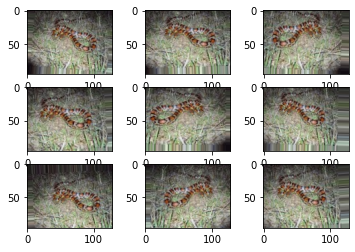

In [9]:
img = load_img('data/train/pantherophis-guttatus/030747b0f4.jpg')        # Sample Image

data = img_to_array(img)

samples = np.expand_dims(data, 0)


it = datagen.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
# show the figure
plt.show()

## Model

In [10]:
NAME="VGG16WithLast2UnFrozzenMoreData"

In [12]:
vgg = tf.keras.applications.vgg16.VGG16()

In [13]:
model = Sequential()

In [14]:
for layer in vgg.layers[:-1]:
    model.add(layer)
for layer in model.layers[:-2]:
    layer.trainable = False

In [15]:
# Dense
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

#Output
model.add(Dense(35, activation="softmax"))

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:

model.fit(
    x=train_batches,
    steps_per_epoch= train_batches.n // train_batches.batch_size,
    validation_data= valid_batches,
    validation_steps= valid_batches.n // valid_batches.batch_size,
    epochs=ep
)


Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
199/199 [==============================] - ETA: 0s - loss: 3.0938 - accuracy: 0.1882 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001989E2A33A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [18]:
model.save("VGG162UnfMoreData")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: VGG162UnfMoreData\assets


## Result

In [25]:
def append_ext(fn):    # Helper function to append extention name for image id
    return fn + ".jpg"

In [26]:
def create_test_data():
    images = []       # List containes path of all the testing images in right seq
    test_data = []    
    df = pd.read_csv(test_csv)
    names_df = df['image_id'].apply(append_ext)
    for img in names_df:
        img_path = os.path.join(test_path, img)
        images.append(img_path)        
    for img_path in images:
        try:
            img_array = cv2.imread(img_path ,cv2.COLOR_BGR2RGB)  # convert to array
            new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
            test_data.append(new_array.reshape(224, 224, 3))  # add this to our training_data

        except Exception as e:
            print("Error !!")
            print(e)
            pass
    return test_data
test_data = np.array(create_test_data())
print(test_data.shape)

(2361, 224, 224, 3)


In [27]:
prediction = model.predict(test_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [28]:
results = []
for i in prediction:
    results.append(np.argmax(i))
results[:5]

[24, 2, 0, 8, 24]

In [29]:
cats = train_batches.class_indices.keys()
cats = list(cats)

In [30]:
def save_results(results):
    images = pd.read_csv(test_csv)["image_id"]
    with open("results-best.csv", "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["image_id", "breed"])
        for i in range(len(images)):
            res = str(cats[results[i]])
            img = images[i]
            w.writerow([img, res])
save_results(results)